In [ ]:
   # Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
file_path = '/content/blkjckhands_reduced.csv'  # Replace with your file path
data = pd.read_csv(file_path)

data

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,13
299996,2,Player3,4,2,7,0,0,13,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,6
299997,3,Player4,2,8,3,0,0,13,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,10
299998,4,Player5,7,5,0,4,0,16,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,12


In [ ]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Create a new column 'PlayershandsPlayed' by counting values > 0 across card1, card2, card3, card4, card5
df['PlayershandsPlayed'] = (df[['card1', 'card2', 'card3', 'card4', 'card5']] > 0).sum(axis=1)

# Create a new column 'DealershandsPlayed' by counting values > 0 across card1, card2, card3, card4, card5
df['DealershandsPlayed'] = (df[['dealcard1', 'dealcard2', 'dealcard3', 'dealcard4', 'dealcard5']] > 0).sum(axis=1)

# Create the three new columns (ply3cardsum, ply4cardsum, and ply5cardsum) that sum the values of different combinations of the card columns (card1, card2, card3, card4, and card5)
df['ply3cardsum'] = df['card1'] + df['card2'] + df['card3']
df['ply4cardsum'] = df['card1'] + df['card2'] + df['card3'] + df['card4']
df['ply5cardsum'] = df['card1'] + df['card2'] + df['card3'] + df['card4'] + df['card5']

# Create the three new columns (dl2cardsum, dl3cardsum, dl4cardsum and dl5cardsum) that sum the values of different combinations of the card columns (dealcard1, dealcard2, dealcard3, dealcard4, and dealcard5)
df['dl2cardsum'] = df['dealcard1'] + df['dealcard2']
df['dl3cardsum'] = df['dealcard1'] + df['dealcard2']+ df['dealcard3']
df['dl4cardsum'] = df['dealcard1'] + df['dealcard2']+ df['dealcard3']+ df['dealcard4']
df['dl5cardsum'] = df['dealcard1'] + df['dealcard2']+ df['dealcard3']+ df['dealcard4']+ df['dealcard5']

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,ply2cardsum,PlayershandsPlayed,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,dl2cardsum,dl3cardsum,dl4cardsum,dl5cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,17,2,2,17,17,17,18,18,18,18
1,1,Player2,10,9,0,0,0,19,10,8,...,19,2,2,19,19,19,18,18,18,18
2,2,Player3,9,8,0,0,0,17,10,8,...,17,2,2,17,17,17,18,18,18,18
3,3,Player4,2,10,0,5,0,17,10,8,...,12,3,2,12,17,17,18,18,18,18
4,4,Player5,10,2,0,5,0,17,10,8,...,12,3,2,12,17,17,18,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,13,2,3,13,13,13,6,17,17,17
299996,2,Player3,4,2,7,0,0,13,2,4,...,6,3,3,13,13,13,6,17,17,17
299997,3,Player4,2,8,3,0,0,13,2,4,...,10,3,3,13,13,13,6,17,17,17
299998,4,Player5,7,5,0,4,0,16,2,4,...,12,3,3,12,16,16,6,17,17,17


In [ ]:
# Define the function to apply the strategy logic
def determine_strategy(row):
    if row['card3'] == 0 and row['card4'] == 0:
        return "Stay"
    elif row['card3'] == 0 and row['card4'] != 0:
        return "DblDown"
    elif row['card3'] > 0:
        return "Hit"

# Create a new column 'ply2CardStrategy' using the defined function
df['ply2CardStrategy'] = df.apply(determine_strategy, axis=1)

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,PlayershandsPlayed,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,dl2cardsum,dl3cardsum,dl4cardsum,dl5cardsum,ply2CardStrategy
0,0,Player1,7,10,0,0,0,17,10,8,...,2,2,17,17,17,18,18,18,18,Stay
1,1,Player2,10,9,0,0,0,19,10,8,...,2,2,19,19,19,18,18,18,18,Stay
2,2,Player3,9,8,0,0,0,17,10,8,...,2,2,17,17,17,18,18,18,18,Stay
3,3,Player4,2,10,0,5,0,17,10,8,...,3,2,12,17,17,18,18,18,18,DblDown
4,4,Player5,10,2,0,5,0,17,10,8,...,3,2,12,17,17,18,18,18,18,DblDown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,2,3,13,13,13,6,17,17,17,Stay
299996,2,Player3,4,2,7,0,0,13,2,4,...,3,3,13,13,13,6,17,17,17,Hit
299997,3,Player4,2,8,3,0,0,13,2,4,...,3,3,13,13,13,6,17,17,17,Hit
299998,4,Player5,7,5,0,4,0,16,2,4,...,3,3,12,16,16,6,17,17,17,DblDown


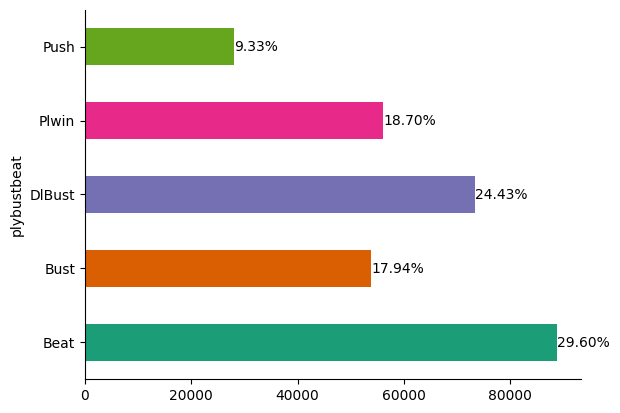

In [ ]:
# DataFrame and 'plybustbeat' is a column
counts = df.groupby('plybustbeat').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    plt.text(value, index, f'{percentage:.2f}%', va='center')  # Display percentage

# Show the plot
plt.show()

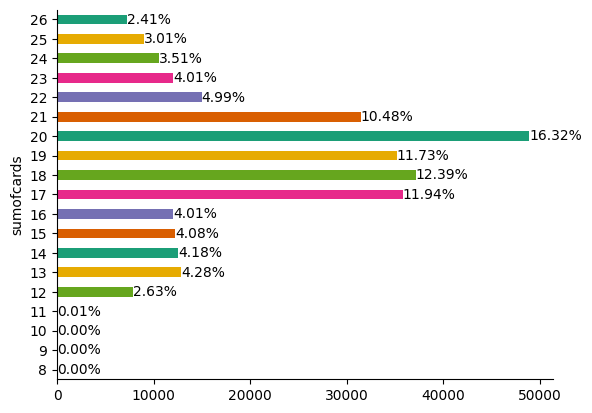

In [ ]:
# DataFrame and 'plybustbeat' is a column
counts = df.groupby('sumofcards').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    plt.text(value, index, f'{percentage:.2f}%', va='center')  # Display percentage

# Show the plot
plt.show()

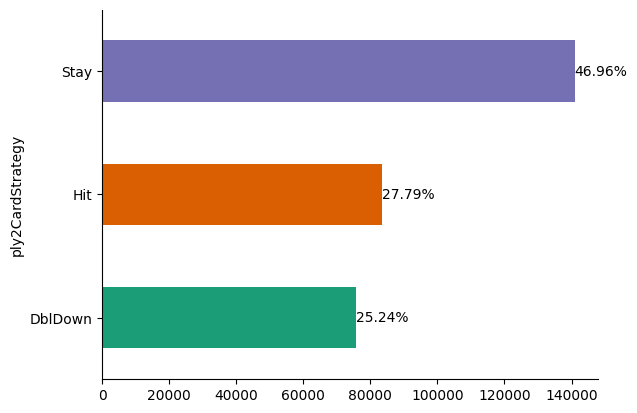

In [ ]:
# Bar chart to show % of total selected strategy from original 2card
counts = df.groupby('ply2CardStrategy').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    plt.text(value, index, f'{percentage:.2f}%', va='center')  # Display percentage

# Show the plot
plt.show()


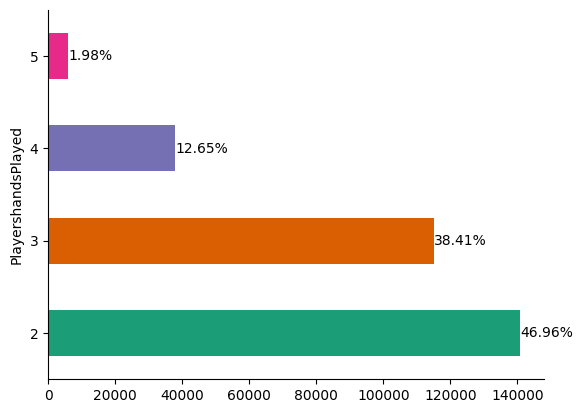

In [ ]:
# DataFrame and 'plybustbeat' is a column
counts = df.groupby('PlayershandsPlayed').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    plt.text(value, index, f'{percentage:.2f}%', va='center')  # Display percentage

# Show the plot
plt.show()

In [ ]:
# Group by 'sumofcards' and 'plybustbeat', then count occurrences
result = df.groupby(['sumofcards', 'plybustbeat', ]).size().reset_index(name='count')

# Display the result
print(result)

    sumofcards plybustbeat  count
0            8        Beat      1
1            9        Beat      2
2            9      DlBust      1
3           10        Beat      8
4           10      DlBust      4
5           11        Beat     22
6           11      DlBust     11
7           12        Beat   4601
8           12      DlBust   3278
9           12       Plwin      2
10          12        Push      4
11          13        Beat   7839
12          13      DlBust   4985
13          13       Plwin     15
14          13        Push     15
15          14        Beat   7456
16          14      DlBust   5038
17          14       Plwin     24
18          14        Push     12
19          15        Beat   7340
20          15      DlBust   4835
21          15       Plwin     38
22          15        Push     32
23          16        Beat   7348
24          16      DlBust   4588
25          16       Plwin     66
26          16        Push     43
27          17        Beat  20947
28          17

In [ ]:
# Group by 'sumofcards' and 'plybustbeat', then count occurrences
result = df.groupby(['PlayershandsPlayed', 'winloss', ]).size().reset_index(name='count')

# Display the result
print(result)

    PlayershandsPlayed winloss  count
0                    2    Loss  51385
1                    2    Push  14917
2                    2     Win  74588
3                    3    Loss  62443
4                    3    Push   9925
5                    3     Win  42852
6                    4    Loss  24750
7                    4    Push   2770
8                    4     Win  10421
9                    5    Loss   4050
10                   5    Push    385
11                   5     Win   1514
